Data Preprocessing

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('./Customers.csv')
transactions = pd.read_csv('./Transactions.csv')


# Merge data on CustomerID
data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index()

# Merge with customer profile data
data = pd.merge(data, customers[['CustomerID', 'Region']], on='CustomerID')

# One-hot encode the 'Region' column
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# transaction-based features and one-hot encoded Region columns
columns_to_scale = ['TotalValue', 'Quantity', 'TransactionID'] + [col for col in data.columns if col.startswith('Region_')]

# Normalize selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_scale])

print(data.head())

  CustomerID  TotalValue  Quantity  TransactionID  Region_Europe  \
0      C0001     3354.52        12              5          False   
1      C0002     1862.74        10              4          False   
2      C0003     2725.38        14              4          False   
3      C0004     5354.88        23              8          False   
4      C0005     2034.24         7              3          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


Clustering with K-Means

In [12]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_data, data['Cluster'])
silhouette = silhouette_score(scaled_data, data['Cluster'])

print(f"DB Index: {db_index:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

DB Index: 0.938
Silhouette Score: 0.401


Visuvalising the Clusters

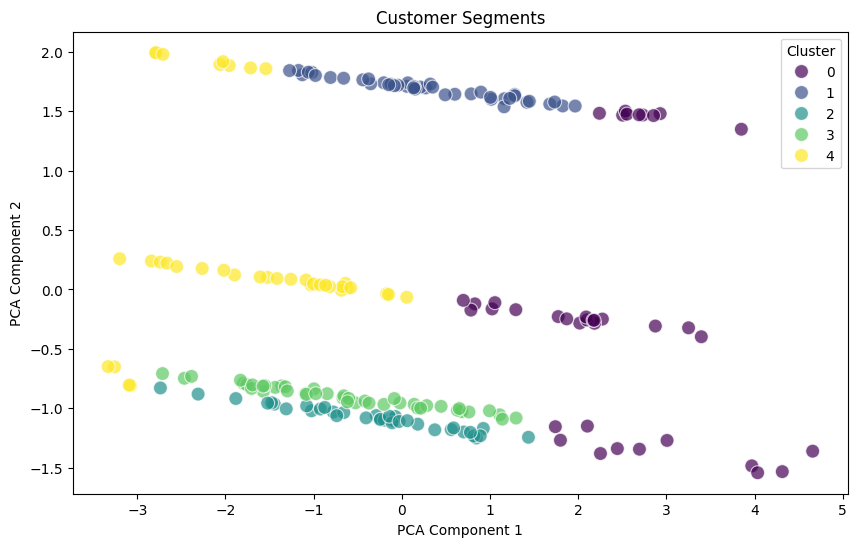

In [13]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA components to the data for visualization
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.7)
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='upper right')
plt.show()

Find the Optimal Number of Clusters

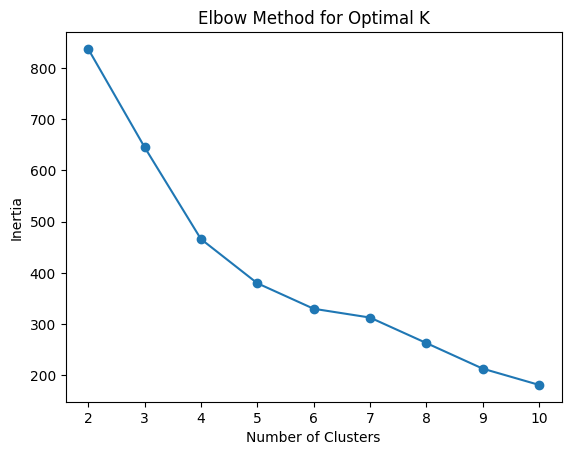

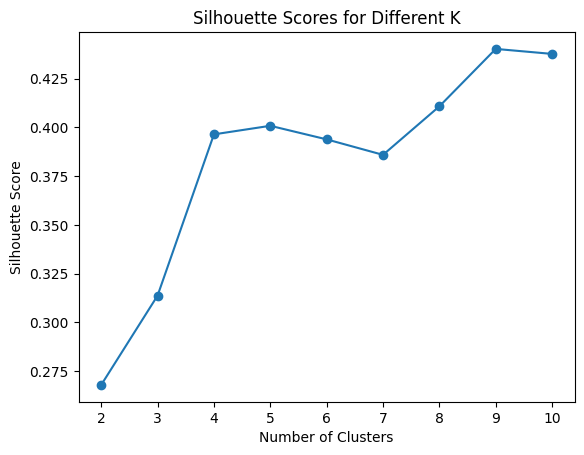

In [14]:
# Elbow method to determine optimal k
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot inertia (Elbow Method)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()